In [1]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

LOAD DATASET

In [2]:
df=pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
df['Age'] = df['Age'].astype(int)

In [4]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


EXPLORATORY DATA ANALYSIS

In [5]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   int64  
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [7]:
df.isna().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [9]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,23.972525,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.308664,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.000000,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.000000,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [10]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [11]:
df.tail()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
2106,20,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,23,Female,1.738836,133.472641,Sometimes,yes,3.0,3.0,no,no,2.863513,yes,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


LABEL ENCODER

In [28]:
from sklearn.preprocessing import LabelEncoder

In [46]:
le_Gender=LabelEncoder()
le_CALC=LabelEncoder()
le_FAVC=LabelEncoder()
le_SCC=LabelEncoder()
le_SMOKE=LabelEncoder()
le_family_history_with_overweight=LabelEncoder()
le_CAEC=LabelEncoder()
le_MTRANS=LabelEncoder()
le_NObeyesdad=LabelEncoder()

In [47]:
df['Gender']=le_Gender.fit_transform(df['Gender'])
df['CALC']=le_CALC.fit_transform(df['CALC'])
df['FAVC']=le_FAVC.fit_transform(df['FAVC'])
df['SCC']=le_SCC.fit_transform(df['SCC'])
df['SMOKE']=le_SMOKE.fit_transform(df['SMOKE'])
df['family_history_with_overweight']=le_family_history_with_overweight.fit_transform(df['family_history_with_overweight'])
df['CAEC']=le_CAEC.fit_transform(df['CAEC'])
df['MTRANS']=le_MTRANS.fit_transform(df['MTRANS'])
df['obesity']=le_NObeyesdad.fit_transform(df['NObeyesdad'])

In [48]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,obesity
0,21,0,1.620000,64.000000,3,0,2.0,3.0,0,0,2.000000,1,0.000000,1.000000,2,3,Normal_Weight,1
1,21,0,1.520000,56.000000,2,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,2,3,Normal_Weight,1
2,23,1,1.800000,77.000000,1,0,2.0,3.0,0,0,2.000000,1,2.000000,1.000000,2,3,Normal_Weight,1
3,27,1,1.800000,87.000000,1,0,3.0,3.0,0,0,2.000000,0,2.000000,0.000000,2,4,Overweight_Level_I,5
4,22,1,1.780000,89.800000,2,0,2.0,1.0,0,0,2.000000,0,0.000000,0.000000,2,3,Overweight_Level_II,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20,0,1.710730,131.408528,2,1,3.0,3.0,0,0,1.728139,1,1.676269,0.906247,2,3,Obesity_Type_III,4
2107,21,0,1.748584,133.742943,2,1,3.0,3.0,0,0,2.005130,1,1.341390,0.599270,2,3,Obesity_Type_III,4
2108,22,0,1.752206,133.689352,2,1,3.0,3.0,0,0,2.054193,1,1.414209,0.646288,2,3,Obesity_Type_III,4
2109,24,0,1.739450,133.346641,2,1,3.0,3.0,0,0,2.852339,1,1.139107,0.586035,2,3,Obesity_Type_III,4


HEATMAP

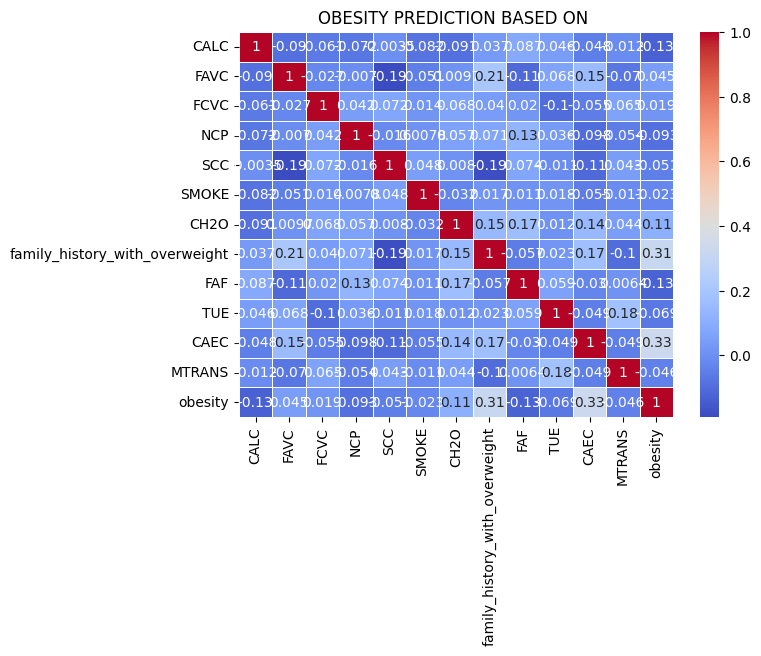

In [101]:
plt.figure(figsize=(7, 5))
corr=df[["CALC","FAVC","FCVC","NCP","SCC","SMOKE","CH2O","family_history_with_overweight","FAF","TUE","CAEC","MTRANS","obesity"]].corr()
sns.heatmap(corr,annot=True,linewidths=0.5,cmap='coolwarm')
plt.title('OBESITY PREDICTION BASED ON ')

plt.show()

In [93]:
import seaborn as sns;
import matplotlib.pyplot as plt

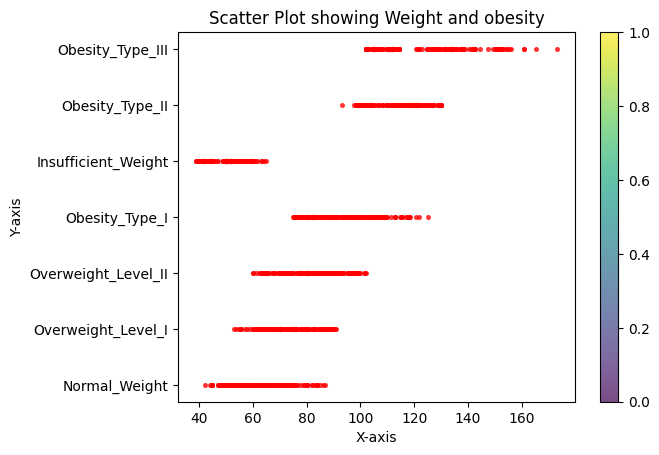

In [94]:
plt.scatter(df['Weight'],df['NObeyesdad'], c='red', s=7, cmap='viridis', alpha=0.7)
plt.colorbar()  
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot showing Weight and obesity')
plt.show()

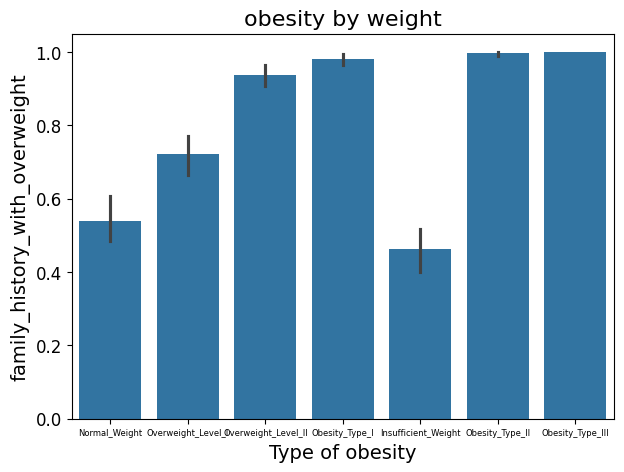

In [102]:
plt.figure(figsize=(7, 5))
sns.barplot(x='NObeyesdad', y='family_history_with_overweight', data=df)
plt.title('obesity by weight', fontsize=16)
plt.xlabel('Type of obesity', fontsize=14)
plt.ylabel('family_history_with_overweight', fontsize=14)
plt.xticks(fontsize=6)
plt.yticks(fontsize=12)
plt.show()

SEPARATE FEATURE AND TARGET

In [52]:
x=df.drop(['NObeyesdad','obesity','TUE','NCP','SCC','MTRANS'],axis=1)
x

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,SMOKE,CH2O,family_history_with_overweight,FAF,CAEC
0,21,0,1.620000,64.000000,3,0,2.0,0,2.000000,1,0.000000,2
1,21,0,1.520000,56.000000,2,0,3.0,1,3.000000,1,3.000000,2
2,23,1,1.800000,77.000000,1,0,2.0,0,2.000000,1,2.000000,2
3,27,1,1.800000,87.000000,1,0,3.0,0,2.000000,0,2.000000,2
4,22,1,1.780000,89.800000,2,0,2.0,0,2.000000,0,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20,0,1.710730,131.408528,2,1,3.0,0,1.728139,1,1.676269,2
2107,21,0,1.748584,133.742943,2,1,3.0,0,2.005130,1,1.341390,2
2108,22,0,1.752206,133.689352,2,1,3.0,0,2.054193,1,1.414209,2
2109,24,0,1.739450,133.346641,2,1,3.0,0,2.852339,1,1.139107,2


In [53]:
y=df.NObeyesdad
y

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object

TRAIN TEST SPLIT

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=47,stratify=y)

In [55]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(1583, 12) (1583,) (528, 12) (528,)


In [56]:
x_train.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,SMOKE,CH2O,family_history_with_overweight,FAF,CAEC
1053,18,1,1.751278,86.963628,2,0,3.000000,0,2.000000,1,1.271667,2
1697,23,1,1.754439,119.441207,2,1,1.893428,0,2.000000,1,1.917383,2
957,39,0,1.580765,62.631382,2,1,2.487167,0,2.396977,1,0.577063,2
1037,18,1,1.704908,81.384224,2,1,2.650629,0,1.708083,1,1.876051,2
290,16,1,1.820000,71.000000,2,1,2.000000,0,2.000000,1,2.000000,1


In [57]:
x_test.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,SMOKE,CH2O,family_history_with_overweight,FAF,CAEC
1483,37,0,1.516007,77.033049,2,1,2.000000,0,1.618370,1,0.120165,2
541,19,0,1.688426,49.660995,2,0,2.714447,0,2.000000,0,1.903182,1
1587,25,1,1.858265,117.574570,2,1,2.028571,0,2.530428,1,1.312570,2
1961,26,0,1.613574,107.012256,2,1,3.000000,0,2.678779,1,0.000000,2
948,31,0,1.666023,72.906186,2,1,2.000000,0,1.000000,1,0.000000,2


In [58]:
y_train.head()

1053    Overweight_Level_II
1697        Obesity_Type_II
957      Overweight_Level_I
1037    Overweight_Level_II
290           Normal_Weight
Name: NObeyesdad, dtype: object

In [59]:
y_test.head()

1483         Obesity_Type_I
541     Insufficient_Weight
1587        Obesity_Type_II
1961       Obesity_Type_III
948      Overweight_Level_I
Name: NObeyesdad, dtype: object

SVC

In [60]:
svc=SVC(kernel='linear')

In [61]:
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [62]:
svc.score(x_train,y_train)

0.8862918509159823

In [63]:
svc.score(x_test,y_test)

0.8768939393939394

MODEL EVALUATION

In [64]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [65]:
x_train_prd=svc.predict(x_train)
train_accuracy=accuracy_score(x_train_prd,y_train)
print('train accuracy:', train_accuracy)

train accuracy: 0.8862918509159823


In [66]:
x_test_prd=svc.predict(x_test)
test_accuracy=accuracy_score(x_test_prd,y_test)
print('trest_accuracy:',test_accuracy)

trest_accuracy: 0.8768939393939394


RANDOM FOREST

In [67]:
r=RandomForestClassifier(n_estimators=50)
r.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [68]:
r.score(x_train,y_train)

1.0

In [69]:
r.score(x_test,y_test)

0.9621212121212122

MODEL EVALUATION

In [70]:
x_train_pred=r.predict(x_train)
train_pred=accuracy_score(x_train_pred,y_train)
print("train accuracy:",train_pred)

train accuracy: 1.0


In [71]:
x_test_pred=r.predict(x_test)
test_pred=accuracy_score(x_test_pred,y_test)
print("test accuracy:",test_pred)

test accuracy: 0.9621212121212122


LOGISTIC REGRESSION

In [72]:
lr=LogisticRegression(max_iter=3000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=3000)

In [73]:
lr.score(x_train,y_train)

0.8395451674036639

In [74]:
lr.score(x_test,y_test)

0.821969696969697

MODEL EVALUATION

In [75]:
x_train_p=lr.predict(x_train)
train_p=accuracy_score(x_train_p,y_train)
print("train accuracy:",train_p)

train accuracy: 0.8395451674036639


In [76]:
x_test_p=lr.predict(x_test)
test_p=accuracy_score(x_test_p,y_test)
print("test accuracy:",test_p)

test accuracy: 0.821969696969697


In [77]:
x_test_pred=r.predict(x_test)

In [78]:
accuracy_score(x_test_pred,y_test)

0.9621212121212122

In [79]:
cm=confusion_matrix(x_test_pred,y_test)
cm

array([[66,  2,  0,  0,  0,  0,  0],
       [ 2, 70,  0,  0,  0,  5,  1],
       [ 0,  0, 85,  1,  0,  0,  1],
       [ 0,  0,  0, 73,  0,  0,  0],
       [ 0,  0,  0,  0, 81,  0,  0],
       [ 0,  0,  0,  0,  0, 65,  3],
       [ 0,  0,  3,  0,  0,  2, 68]])

In [80]:
report=classification_report(x_test_pred,y_test)
print(report)

                     precision    recall  f1-score   support

Insufficient_Weight       0.97      0.97      0.97        68
      Normal_Weight       0.97      0.90      0.93        78
     Obesity_Type_I       0.97      0.98      0.97        87
    Obesity_Type_II       0.99      1.00      0.99        73
   Obesity_Type_III       1.00      1.00      1.00        81
 Overweight_Level_I       0.90      0.96      0.93        68
Overweight_Level_II       0.93      0.93      0.93        73

           accuracy                           0.96       528
          macro avg       0.96      0.96      0.96       528
       weighted avg       0.96      0.96      0.96       528



SAVE TO PICKLE FILE

In [81]:
import pickle

In [82]:
filename='trained_model.r'
pickle.dump(r,open(filename,'wb'))

In [83]:
loaded_model=pickle.load(open(r"trained_model.r",'rb'))
loaded_model

RandomForestClassifier(n_estimators=50)

In [84]:
input_data=(25,0,1.89,67,2,0,2,3,0,0,1,1)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)
prediction=loaded_model.predict(input_data_reshape)
print(prediction)

['Normal_Weight']


USER INTERFACE

In [87]:
import gradio as gr

In [88]:
# Save the encoders to files
with open('le_Gender.pkl', 'wb') as f:
    pickle.dump(le_Gender, f)

with open('le_CALC.pkl', 'wb') as f:
    pickle.dump(le_CALC, f)
    
with open('le_FAVC.pkl', 'wb') as f:
    pickle.dump(le_FAVC, f)

with open('le_SMOKE.pkl', 'wb') as f:
    pickle.dump(le_SMOKE, f)
with open('le_family_history_with_overweight.pkl', 'wb') as f:
    pickle.dump(le_family_history_with_overweight, f)  
with open('le_CAEC.pkl', 'wb') as f:
    pickle.dump(le_CAEC, f)   
 
    

In [89]:
# Load label encoders
le_Gender = pickle.load(open("le_Gender.pkl", "rb"))
le_CALC= pickle.load(open("le_CALC.pkl", "rb"))
le_FAVC= pickle.load(open("le_FAVC.pkl", "rb"))
le_SMOKE= pickle.load(open("le_SMOKE.pkl", "rb"))
le_family_history_with_overweight= pickle.load(open("le_family_history_with_overweight.pkl", "rb"))
le_CAEC= pickle.load(open("le_CAEC.pkl", "rb"))



In [105]:
loaded_model=pickle.load(open(r"trained_model.r",'rb'))

#Get label options for dropdowns
Gender_options = le_Gender.classes_.tolist()
CALC_options = le_CALC.classes_.tolist()
FAVC_options = le_FAVC.classes_.tolist()
SMOKE_options = le_SMOKE.classes_.tolist()
family_history_with_overweight_options =le_family_history_with_overweight.classes_.tolist()
CAEC_options = le_CAEC.classes_.tolist()


def predict_Obesity(Age,Gender,Height,Weight,CALC,FAVC,FCVC,SMOKE,CH20,family_history_with_overweight,FAF,CAEC):
    try:
        
        Gender=le_Gender.transform([Gender])[0]
        CALC=le_CALC.transform([CALC])[0]
        FAVC=le_FAVC.transform([FAVC])[0]
        
        SMOKE=le_SMOKE.transform([SMOKE])[0]
        family_history_with_overweight=le_family_history_with_overweight.transform([family_history_with_overweight])[0]
        CAEC=le_CAEC.transform([CAEC])[0]
       
    except ValueError:
         return "Invalid data or description. Please select from the dropdown."
         
    input_data = np.array([Age,Gender,Height,Weight,CALC,FAVC,FCVC,SMOKE,CH20,family_history_with_overweight,FAF,CAEC]).reshape(1, -1)
    prediction = loaded_model.predict(input_data)
    return prediction
    
iface = gr.Interface(
    fn=predict_Obesity,inputs=[
        gr.Number(label="Age"),
        gr.Dropdown(choices=Gender_options,label="Gender"),
        gr.Number(label="Height"),
        gr.Number(label="Weight"),
        gr.Dropdown(choices=CALC_options,label="Frequency of alcohol consumption "),
        gr.Dropdown(choices=FAVC_options,label="Frequent consumption of high-calorie food"),
        gr.Number(label="Frequency of vegetable consumption (e.g., 1–3 scale)"),
     
        
        gr.Dropdown(choices=SMOKE_options,label="SMOKE"),
        gr.Number(label="Daily water intake (e.g., 1–3 scale)"),
        gr.Dropdown(choices=family_history_with_overweight_options,label="family_history_with_overweight"),
        gr.Number(label="Frequency of physical activity (e.g., 0–3 scale)"),

        gr.Dropdown(choices=CAEC_options,label="Eating between meals "),

    ],
    outputs="text",
    title="Obesity Prediction",
    description="Enter the parameters to predict obesity."
)
iface.launch()

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


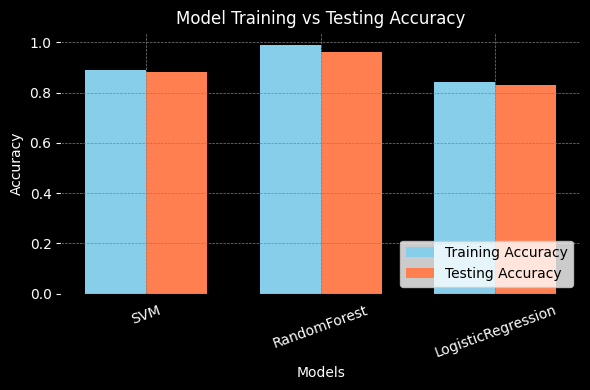

In [104]:
models = [
     'SVM','RandomForest','LogisticRegression'
]

# Simulated accuracy values
train_scores = [0.89,0.99,0.84]
test_scores = [0.88,0.96,0.83]

# Bar positions
x = np.arange(len(models))
width = 0.35

# Create the figure
fig, ax = plt.subplots(figsize=(6, 4), facecolor='black')
fig.patch.set_facecolor('black')

# Plot bars
ax.bar(x - width/2, train_scores, width, label='Training Accuracy', color='skyblue')
ax.bar(x + width/2, test_scores, width, label='Testing Accuracy', color='coral')

# Labels and title
ax.set_ylabel('Accuracy', color='white')
ax.set_xlabel('Models', color='white')
ax.set_title('Model Training vs Testing Accuracy', color='white')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=20, color='white')

# Styling
ax.legend(loc='lower right')
ax.set_facecolor('black')
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
ax.tick_params(axis='y', colors='white')

# Display the plot
plt.tight_layout()
plt.show()